# **Task:**
---

Implement the GCD algorithm and examine its time complexity using counting of iterations. Compare this with execution time.

# **Libraries:**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma
from tabulate import tabulate
import time

# **GCD Algorithm:**

The algorithm is based on the division algorithm, which states that for any integers $m$ and $n$ (with $n > 0$), there exist unique integers $q$ (the quotient) and $r$ (the remainder) such that

$$
m = n \cdot q + r \quad \text{with} \quad 0 \le r < n.
$$

Since

$$
\gcd(m, n) = \gcd(n, r),
$$

we can repeatedly apply this property. The steps of the looping algorithm are as follows:

1. **Initialization:**  
   Set $m' = m$ and $n' = n$. If $m' < n'$, swap $m'$ and $n'$.

2. **Iteration:**  
   While $n' > 0$:
   - Compute $q = m' \div n'$ (using integer division).
   - Compute $r = m' \mod n'$.
   - Update $m'$ and $n'$ by setting $m' \leftarrow n'$ and $n' \leftarrow r$.

3. **Termination:**  
   When $n'$ becomes 0, return $m'$ as the $\gcd(m, n)$.


**Note:** I have used simple $\div$ and $\mod$, as we only want time elapsed for only GCD algorithm in complexity analysis.

The algorithm's correctness rests on the following properties:

- $ \gcd(n, m) = \gcd(m, n) $.
- If $m = n \cdot q + r$, then $ \gcd(m, n) = \gcd(n, r) $.
- If $n = 0$, then $\gcd(m, 0) = m$.

These ensure that the **loop invariant** is maintained, and that the pair $(m', n')$ decreases at each iteration (by Fermat's descent), guaranteeing termination.

In [19]:
def gcd_with_count(m, n):
    count = 0
    m_prime, n_prime = m, n  
    
    if m_prime < n_prime:
        m_prime, n_prime = n_prime, m_prime  

    while n_prime > 0:
        q = m_prime // n_prime
        r = m_prime % n_prime

        m_prime, n_prime = n_prime, r  
        count += 1

    return m_prime, count

In [22]:
m = 57
n = 21
gcd_value, count = gcd_with_count(m, n)
print(f"GCD: {gcd_value}, Iterations: {count}")

GCD: 3, Iterations: 4


## **Iterations and Time complexity analysis:**

The worst-case input for this algorithm occurs when the quotient $q = 1$ at every iteration. In such cases, the inputs are consecutive Fibonacci numbers.

- The smallest pair of numbers that forces the algorithm to take $k$ iterations is $(F_{k+1}, F_k)$, where the Fibonacci sequence is defined as:
  - $F_0 = 0$,  
  - $F_1 = 1$,  
  - $F_{k+2} = F_{k+1} + F_k$ for $k \ge 0$.

Since Fibonacci numbers grow exponentially with $k$, the size (number of digits) of the input grows linearly with $k$. Thus, in the worst case, the algorithm requires $\Theta(k)$ iterations for an input of size $\Theta(k)$.


The overall time complexity depends on two main factors:
1. **Number of Iterations:** In the worst case (using Fibonacci numbers), the algorithm takes $\Theta(k)$ iterations.
2. **Cost per Iteration:** If each integer division takes $O(f(n))$ time (with the standard long division method being $O(n^2)$), then the total time complexity is $O(k \cdot f(n))$.

For example, using the school method of long division (with $O(n^2)$ per division), the worst-case time complexity can be as high as $O(k \cdot n^2)$. More refined analyses or alternative methods, like the Binary GCD algorithm, can yield better performance.

In [32]:
def fibonacci_sequence(k):
    fib = [0, 1]
    
    for _ in range(k-2):
        fib.append(fib[-1] + fib[-2])
    
    return fib[1:]

k = 100

fib_numbers = fibonacci_sequence(k)

indices = []
iterations_list = []
time_list = []

for i in range(len(fib_numbers) - 1):
    m, n = fib_numbers[i+1], fib_numbers[i]

    start_time = time.time()
    _, iterations = gcd_with_count(m, n)
    end_time = time.time()

    elapsed_time = end_time - start_time

    indices.append(i + 2)
    iterations_list.append(iterations)
    time_list.append(elapsed_time)

In [35]:
# Iterations and time elapsed table:
table_data = list(zip(indices, iterations_list, time_list))
headers = ["Fibonacci Index (k)", "GCD Iterations", "Execution Time (seconds)"]
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒═══════════════════════╤══════════════════╤════════════════════════════╕
│   Fibonacci Index (k) │   GCD Iterations │   Execution Time (seconds) │
╞═══════════════════════╪══════════════════╪════════════════════════════╡
│                     2 │                1 │                2.14577e-06 │
├───────────────────────┼──────────────────┼────────────────────────────┤
│                     3 │                1 │                7.15256e-07 │
├───────────────────────┼──────────────────┼────────────────────────────┤
│                     4 │                2 │                9.53674e-07 │
├───────────────────────┼──────────────────┼────────────────────────────┤
│                     5 │                3 │                9.53674e-07 │
├───────────────────────┼──────────────────┼────────────────────────────┤
│                     6 │                4 │                4.76837e-07 │
├───────────────────────┼──────────────────┼────────────────────────────┤
│                     7 │             

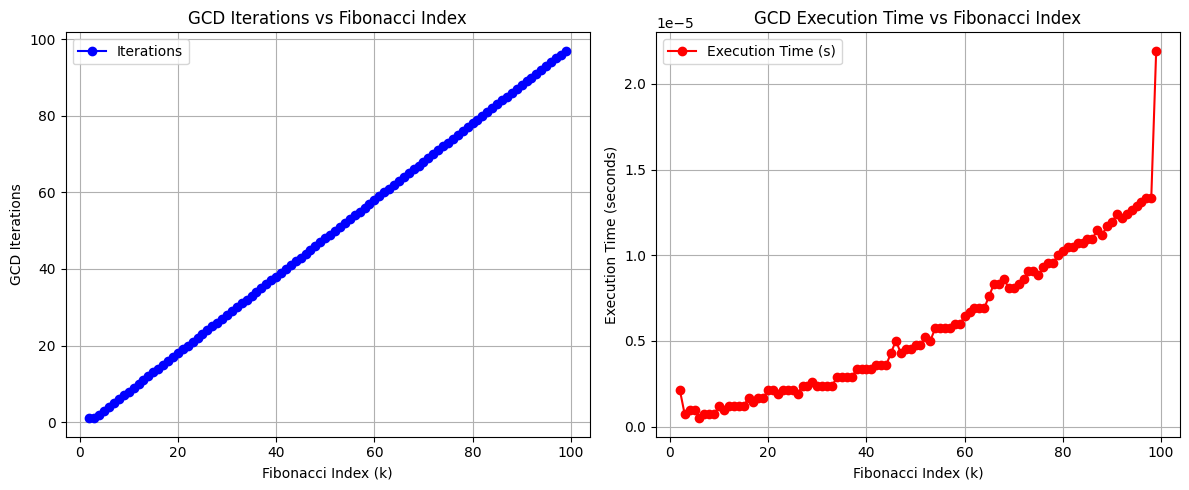

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(indices, iterations_list, marker='o', linestyle='-', color='b', label="Iterations")
plt.xlabel("Fibonacci Index (k)")
plt.ylabel("GCD Iterations")
plt.title("GCD Iterations vs Fibonacci Index")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(indices, time_list, marker='o', linestyle='-', color='r', label="Execution Time (s)")
plt.xlabel("Fibonacci Index (k)")
plt.ylabel("Execution Time (seconds)")
plt.title("GCD Execution Time vs Fibonacci Index")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

When testing with consecutive Fibonacci numbers, both the iteration count and execution time grow linearly with the Fibonacci index $k$, confirming the worst-case analysis. And despite the worst-case scenario, the Euclidean algorithm is highly efficient for most inputs. The invariant maintained throughout the algorithm (often expressible as $m' = c \cdot m + d \cdot n$) underpins its correctness.